# cygnus-vs-my5-degree

Compare Cygnus and my5 (versions 1 and 2) at high and low bandwidth settings.

Cap the degree to a maximum value.

1/29/2024

In [1]:
import os
import sys

from matplotlib import colormaps
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath("../../../"))
from naboo_utils import table, file

# ~~~ Configuration ~~~
sim_dir_3200 = "/u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_3200"
sim_dir_200 = "/u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_200"
baseline_study = "baseline"
baseline_experiment = "_baseline"

suite_file = "/u/cmolder/GitHub/ChampSim-2022/external/naboo/conf/suites.toml"
benchmark_file = "/u/cmolder/GitHub/ChampSim-2022/external/naboo/conf/benchmarks.toml"
mix_file = "/u/cmolder/GitHub/ChampSim-2022/external/naboo/conf/mixes.toml"
mix_set = "1core_tune"
num_threads = 24

# ~~~ Study ~~~
study_3200 = file.ChampsimStudy.FromExperimentDirs({
    "Cygnus (max1)": os.path.join(sim_dir_3200, "cygnus_degree", "cygnus__max1"),
    "Cygnus (max2)": os.path.join(sim_dir_3200, "cygnus_degree", "cygnus__max2"),
    "Cygnus (max3)": os.path.join(sim_dir_3200, "cygnus_degree", "cygnus__max3"),
    "Cygnus (max4)": os.path.join(sim_dir_3200, "cygnus_degree", "cygnus__max4"),
    "Cygnus (max5)": os.path.join(sim_dir_3200, "cygnus_degree", "cygnus__max5"),
    "Cygnus (max6)": os.path.join(sim_dir_3200, "cygnus_degree", "cygnus__max6"),
    "Cygnus (max7)": os.path.join(sim_dir_3200, "cygnus_degree", "cygnus__max7"),
    "Cygnus (max8)": os.path.join(sim_dir_3200, "cygnus_degree", "cygnus__max8"),
    "Cygnus (unconstrained)": os.path.join(sim_dir_3200, "prefetchers", "cygnus"),
    "my5 v1 (max1)": os.path.join(sim_dir_3200, "my5_v1_degree", "my5_v1__max1"),
    "my5 v1 (max2)": os.path.join(sim_dir_3200, "my5_v1_degree", "my5_v1__max2"),
    "my5 v1 (max3)": os.path.join(sim_dir_3200, "my5_v1_degree", "my5_v1__max3"),
    "my5 v1 (max4)": os.path.join(sim_dir_3200, "my5_v1_degree", "my5_v1__max4"),
    "my5 v1 (max5)": os.path.join(sim_dir_3200, "my5_v1_degree", "my5_v1__max5"),
    "my5 v1 (max6)": os.path.join(sim_dir_3200, "my5_v1_degree", "my5_v1__max6"),
    "my5 v1 (max7)": os.path.join(sim_dir_3200, "my5_v1_degree", "my5_v1__max7"),
    "my5 v1 (max8)": os.path.join(sim_dir_3200, "my5_v1_degree", "my5_v1__max8"),
    "my5 v1 (unconstrained)": os.path.join(sim_dir_3200, "my5_v1", "my5_v1"),
    # "my5 v2 (max1)": os.path.join(sim_dir_3200, "my5_v2_degree", "my5_v2__max1"),
    # "my5 v2 (max2)": os.path.join(sim_dir_3200, "my5_v2_degree", "my5_v2__max2"),
    # "my5 v2 (max3)": os.path.join(sim_dir_3200, "my5_v2_degree", "my5_v2__max3"),
    # "my5 v2 (max4)": os.path.join(sim_dir_3200, "my5_v2_degree", "my5_v2__max4"),
    # "my5 v2 (max5)": os.path.join(sim_dir_3200, "my5_v2_degree", "my5_v2__max5"),
    # "my5 v2 (max6)": os.path.join(sim_dir_3200, "my5_v2_degree", "my5_v2__max6"),
    # "my5 v2 (max7)": os.path.join(sim_dir_3200, "my5_v2_degree", "my5_v2__max7"),
    # "my5 v2 (max8)": os.path.join(sim_dir_3200, "my5_v2_degree", "my5_v2__max8"),
    # "my5 v2 (unconstrained)": os.path.join(sim_dir_3200, "my5_v2", "my5_v2")
})

study_200 = file.ChampsimStudy.FromExperimentDirs({
    "Cygnus (max1)": os.path.join(sim_dir_200, "cygnus_degree", "cygnus__max1"),
    "Cygnus (max2)": os.path.join(sim_dir_200, "cygnus_degree", "cygnus__max2"),
    "Cygnus (max3)": os.path.join(sim_dir_200, "cygnus_degree", "cygnus__max3"),
    "Cygnus (max4)": os.path.join(sim_dir_200, "cygnus_degree", "cygnus__max4"),
    "Cygnus (max5)": os.path.join(sim_dir_200, "cygnus_degree", "cygnus__max5"),
    "Cygnus (max6)": os.path.join(sim_dir_200, "cygnus_degree", "cygnus__max6"),
    "Cygnus (max7)": os.path.join(sim_dir_200, "cygnus_degree", "cygnus__max7"),
    "Cygnus (max8)": os.path.join(sim_dir_200, "cygnus_degree", "cygnus__max8"),
    "Cygnus (unconstrained)": os.path.join(sim_dir_200, "prefetchers", "cygnus"),
    "my5 v1 (max1)": os.path.join(sim_dir_200, "my5_v1_degree", "my5_v1__max1"),
    "my5 v1 (max2)": os.path.join(sim_dir_200, "my5_v1_degree", "my5_v1__max2"),
    "my5 v1 (max3)": os.path.join(sim_dir_200, "my5_v1_degree", "my5_v1__max3"),
    "my5 v1 (max4)": os.path.join(sim_dir_200, "my5_v1_degree", "my5_v1__max4"),
    "my5 v1 (max5)": os.path.join(sim_dir_200, "my5_v1_degree", "my5_v1__max5"),
    "my5 v1 (max6)": os.path.join(sim_dir_200, "my5_v1_degree", "my5_v1__max6"),
    "my5 v1 (max7)": os.path.join(sim_dir_200, "my5_v1_degree", "my5_v1__max7"),
    "my5 v1 (max8)": os.path.join(sim_dir_200, "my5_v1_degree", "my5_v1__max8"),
    "my5 v1 (unconstrained)": os.path.join(sim_dir_200, "my5_v1", "my5_v1"),
    # "my5 v2 (max1)": os.path.join(sim_dir_200, "my5_v2_degree", "my5_v2__max1"),
    # "my5 v2 (max2)": os.path.join(sim_dir_200, "my5_v2_degree", "my5_v2__max2"),
    # "my5 v2 (max3)": os.path.join(sim_dir_200, "my5_v2_degree", "my5_v2__max3"),
    # "my5 v2 (max4)": os.path.join(sim_dir_200, "my5_v2_degree", "my5_v2__max4"),
    # "my5 v2 (max5)": os.path.join(sim_dir_200, "my5_v2_degree", "my5_v2__max5"),
    # "my5 v2 (max6)": os.path.join(sim_dir_200, "my5_v2_degree", "my5_v2__max6"),
    # "my5 v2 (max7)": os.path.join(sim_dir_200, "my5_v2_degree", "my5_v2__max7"),
    # "my5 v2 (max8)": os.path.join(sim_dir_200, "my5_v2_degree", "my5_v2__max8"),
    # "my5 v2 (unconstrained)": os.path.join(sim_dir_200, "my5_v2", "my5_v2")
})

# ~~~ Plotting ~~~
dpi = 192
os.makedirs("cygnus_vs_my5_degree", exist_ok=True)

In [2]:
study_3200.read_all(
    baseline_study=file.ChampsimStudy.FromStudyDir(os.path.join(sim_dir_3200, baseline_study)), 
    baseline_exp=baseline_experiment, 
    num_threads=num_threads
)

study_200.read_all(
    baseline_study=file.ChampsimStudy.FromStudyDir(os.path.join(sim_dir_200, baseline_study)), 
    baseline_exp=baseline_experiment, 
    num_threads=num_threads
)

[ipykernel_launcher][angrist-3] Reading study files: 100%|██████████| 2030/2030 [00:15<00:00, 128.41file/s]
[ipykernel_launcher][angrist-3] Reading study files:  37%|███▋      | 765/2077 [00:08<00:13, 99.53file/s] 

[ipykernel_launcher][angrist-3] [WARNING] /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_200/prefetchers/cygnus/MIS/MIS_3500M: Skipping reading because it failed
[ipykernel_launcher][angrist-3] [WARNING] /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_200/prefetchers/cygnus/BC/BC_26750M: Skipping reading because it failed
[ipykernel_launcher][angrist-3] [WARNING] /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_200/prefetchers/cygnus/bfs__coPapersCiteseer.mtx/bfs__coPapersCiteseer.mtx__64800000000: Skipping reading because it failed


[ipykernel_launcher][angrist-3] Reading study files:  39%|███▉      | 811/2077 [00:09<00:09, 129.60file/s]

[ipykernel_launcher][angrist-3] [WARNING] /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_200/prefetchers/cygnus/Components/Components_3500M: Skipping reading because it failed
[ipykernel_launcher][angrist-3] [WARNING] /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_200/prefetchers/cygnus/cc__belgium_osm.mtx/cc__belgium_osm.mtx__8400000000: Skipping reading because it failed
[ipykernel_launcher][angrist-3] [WARNING] /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_200/prefetchers/cygnus/PageRankDelta/PageRankDelta_24000M: Skipping reading because it failed
[ipykernel_launcher][angrist-3] [WARNING] /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_200/prefetchers/cygnus/BFS/BFS_500M: Skipping reading because it failed
[ipykernel_launcher][angrist-3] [WARNING] /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_200/prefetchers/cygnus/bfs__coAuthorsCiteseer.mtx/bfs__coAuthorsCiteseer.mtx__4800000000: Skipping reading beca

[ipykernel_launcher][angrist-3] Reading study files:  40%|████      | 838/2077 [00:09<00:10, 123.57file/s]

[ipykernel_launcher][angrist-3] [WARNING] /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_200/prefetchers/cygnus/CF/CF_184750M: Skipping reading because it failed
[ipykernel_launcher][angrist-3] [WARNING] /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_200/prefetchers/cygnus/PageRankDelta/PageRankDelta_35250M: Skipping reading because it failed


[ipykernel_launcher][angrist-3] Reading study files:  42%|████▏     | 870/2077 [00:09<00:08, 139.30file/s]

[ipykernel_launcher][angrist-3] [WARNING] /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_200/prefetchers/cygnus/bfs__web-Google.mtx/bfs__web-Google.mtx__19200000000: Skipping reading because it failed
[ipykernel_launcher][angrist-3] [WARNING] /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_200/prefetchers/cygnus/Triangle/Triangle_6000M: Skipping reading because it failed
[ipykernel_launcher][angrist-3] [WARNING] /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_200/prefetchers/cygnus/Triangle/Triangle_3500M: Skipping reading because it failed
[ipykernel_launcher][angrist-3] [WARNING] /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_200/prefetchers/cygnus/PageRankDelta/PageRankDelta_24500M: Skipping reading because it failed
[ipykernel_launcher][angrist-3] [WARNING] /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_200/prefetchers/cygnus/bc__netherlands_osm.mtx/bc__netherlands_osm.mtx__20400000000: Skipping reading b

[ipykernel_launcher][angrist-3] Reading study files:  43%|████▎     | 901/2077 [00:09<00:08, 137.32file/s]

[ipykernel_launcher][angrist-3] [WARNING] /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_200/prefetchers/cygnus/BC/BC_15500M: Skipping reading because it failed
[ipykernel_launcher][angrist-3] [WARNING] /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_200/prefetchers/cygnus/Triangle/Triangle_18000M: Skipping reading because it failed
[ipykernel_launcher][angrist-3] [WARNING] /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_200/prefetchers/cygnus/canneal/canneal_3000M: Skipping reading because it failed
[ipykernel_launcher][angrist-3] [WARNING] /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_200/prefetchers/cygnus/MIS/MIS_21250M: Skipping reading because it failed
[ipykernel_launcher][angrist-3] [WARNING] /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_200/prefetchers/cygnus/Triangle/Triangle_25000M: Skipping reading because it failed
[ipykernel_launcher][angrist-3] [WARNING] /u/cmolder/GitHub/ChampSim-2022/sim/dr

[ipykernel_launcher][angrist-3] Reading study files:  45%|████▌     | 940/2077 [00:10<00:07, 157.70file/s]

[ipykernel_launcher][angrist-3] [WARNING] /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_200/prefetchers/cygnus/facesim/facesim_11750M: Skipping reading because it failed
[ipykernel_launcher][angrist-3] [WARNING] /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_200/prefetchers/cygnus/streamcluster/streamcluster_14750M: Skipping reading because it failed
[ipykernel_launcher][angrist-3] [WARNING] /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_200/prefetchers/cygnus/cc__coPapersCiteseer.mtx/cc__coPapersCiteseer.mtx__68800000000: Skipping reading because it failed
[ipykernel_launcher][angrist-3] [WARNING] /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_200/prefetchers/cygnus/BC/BC_11500M: Skipping reading because it failed
[ipykernel_launcher][angrist-3] [WARNING] /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_200/prefetchers/cygnus/Triangle/Triangle_25250M: Skipping reading because it failed
[ipykernel_launcher][

[ipykernel_launcher][angrist-3] Reading study files:  48%|████▊     | 997/2077 [00:10<00:06, 168.18file/s]

[ipykernel_launcher][angrist-3] [WARNING] /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_200/prefetchers/cygnus/PageRank/PageRank_60750M: Skipping reading because it failed
[ipykernel_launcher][angrist-3] [WARNING] /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_200/prefetchers/cygnus/PageRankDelta/PageRankDelta_56500M: Skipping reading because it failed
[ipykernel_launcher][angrist-3] [WARNING] /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_200/prefetchers/cygnus/bc__web-Google.mtx/bc__web-Google.mtx__29600000000: Skipping reading because it failed
[ipykernel_launcher][angrist-3] [WARNING] /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_200/prefetchers/cygnus/bc__dblp-2010.mtx/bc__dblp-2010.mtx__3200000000: Skipping reading because it failed
[ipykernel_launcher][angrist-3] [WARNING] /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_200/prefetchers/cygnus/fluidanimate/fluidanimate_10250M: Skipping reading becaus

[ipykernel_launcher][angrist-3] Reading study files:  50%|████▉     | 1035/2077 [00:10<00:06, 165.79file/s]

[ipykernel_launcher][angrist-3] [WARNING] /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_200/prefetchers/cygnus/raytrace/raytrace_23750M: Skipping reading because it failed
[ipykernel_launcher][angrist-3] [WARNING] /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_200/prefetchers/cygnus/BFSCC/BFSCC_5000M: Skipping reading because it failed
[ipykernel_launcher][angrist-3] [WARNING] /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_200/prefetchers/cygnus/PageRankDelta/PageRankDelta_17000M: Skipping reading because it failed
[ipykernel_launcher][angrist-3] [WARNING] /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_200/prefetchers/cygnus/raytrace/raytrace_250M: Skipping reading because it failed
[ipykernel_launcher][angrist-3] [WARNING] /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_200/prefetchers/cygnus/bfs__netherlands_osm.mtx/bfs__netherlands_osm.mtx__38400000000: Skipping reading because it failed
[ipykernel_launc

[ipykernel_launcher][angrist-3] Reading study files:  52%|█████▏    | 1072/2077 [00:10<00:05, 172.65file/s]

[ipykernel_launcher][angrist-3] [WARNING] /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_200/prefetchers/cygnus/pr__netherlands_osm.mtx/pr__netherlands_osm.mtx__46400000000: Skipping reading because it failed
[ipykernel_launcher][angrist-3] [WARNING] /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_200/prefetchers/cygnus/canneal/canneal_0M: Skipping reading because it failed
[ipykernel_launcher][angrist-3] [WARNING] /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_200/prefetchers/cygnus/BFSCC/BFSCC_22000M: Skipping reading because it failed
[ipykernel_launcher][angrist-3] [WARNING] /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_200/prefetchers/cygnus/pr__wikipedia-20060925.mtx/pr__wikipedia-20060925.mtx__602800000000: Skipping reading because it failed
[ipykernel_launcher][angrist-3] [WARNING] /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_200/prefetchers/cygnus/bfs__cnr-2000.mtx/bfs__cnr-2000.mtx__12800000000:

[ipykernel_launcher][angrist-3] Reading study files:  53%|█████▎    | 1110/2077 [00:11<00:05, 167.95file/s]

[ipykernel_launcher][angrist-3] [WARNING] /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_200/prefetchers/cygnus/bfs__coAuthorsCiteseer.mtx/bfs__coAuthorsCiteseer.mtx__2800000000: Skipping reading because it failed
[ipykernel_launcher][angrist-3] [WARNING] /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_200/prefetchers/cygnus/cc__wikipedia-20060925.mtx/cc__wikipedia-20060925.mtx__96000000000: Skipping reading because it failed
[ipykernel_launcher][angrist-3] [WARNING] /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_200/prefetchers/cygnus/whiskey/whiskey: Skipping reading because it failed
[ipykernel_launcher][angrist-3] [WARNING] /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_200/prefetchers/cygnus/Components-Shortcut/Components-Shortcut_11500M: Skipping reading because it failed
[ipykernel_launcher][angrist-3] [WARNING] /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_200/prefetchers/cygnus/BC/BC_3500M: Skippin

[ipykernel_launcher][angrist-3] Reading study files:  95%|█████████▌| 1980/2077 [00:14<00:00, 355.58file/s]

[ipykernel_launcher][angrist-3] [WARNING] /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_200/my5_v1/my5_v1/BellmanFord/BellmanFord_24750M: Skipping reading because it failed
[ipykernel_launcher][angrist-3] [WARNING] /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_200/my5_v1/my5_v1/bc__sx-stackoverflow.mtx/bc__sx-stackoverflow.mtx__98400000000: Skipping reading because it failed
[ipykernel_launcher][angrist-3] [WARNING] /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_200/my5_v1/my5_v1/MIS/MIS_3500M: Skipping reading because it failed
[ipykernel_launcher][angrist-3] [WARNING] /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_200/my5_v1/my5_v1/CF/CF_154750M: Skipping reading because it failed
[ipykernel_launcher][angrist-3] [WARNING] /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_200/my5_v1/my5_v1/bc__netherlands_osm.mtx/bc__netherlands_osm.mtx__3600000000: Skipping reading because it failed
[ipykernel_launcher][an

[ipykernel_launcher][angrist-3] Reading study files: 100%|██████████| 2077/2077 [00:14<00:00, 144.74file/s]

[ipykernel_launcher][angrist-3] [WARNING] /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_200/my5_v1/my5_v1/canneal/canneal_1250M: Skipping reading because it failed
[ipykernel_launcher][angrist-3] [WARNING] /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_200/my5_v1/my5_v1/BFS/BFS_5000M: Skipping reading because it failed
[ipykernel_launcher][angrist-3] [WARNING] /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_200/my5_v1/my5_v1/BellmanFord/BellmanFord_5500M: Skipping reading because it failed
[ipykernel_launcher][angrist-3] [WARNING] /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_200/my5_v1/my5_v1/Triangle/Triangle_25000M: Skipping reading because it failed
[ipykernel_launcher][angrist-3] [WARNING] /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_200/my5_v1/my5_v1/pr__coAuthorsCiteseer.mtx/pr__coAuthorsCiteseer.mtx__2000000000: Skipping reading because it failed
[ipykernel_launcher][angrist-3] [WARNING] /u/cmold

In [3]:
tabler_3200 = table.ChampsimTabler(study_3200, suite_file, benchmark_file, mix_file, mix_set)
tabler_200 = table.ChampsimTabler(study_200, suite_file, benchmark_file, mix_file, mix_set)

[ipykernel_launcher][angrist-3] Collating study files...
[ipykernel_launcher][angrist-3] Collating study files...


In [4]:
experiments = study_3200.experiments

colors = {}
for exp in study_3200.experiments:
    if "Cygnus" in exp:
        colors[exp] = colormaps["tab10"](0)
    elif "my5 v1" in exp:
        colors[exp] = colormaps["tab10"](1)
    elif "my5 v2" in exp:
        colors[exp] = colormaps["tab10"](2)
    else:
        colors[exp] = None

hatches = {}
for exp in study_3200.experiments:
    if "unconstrained" in exp:
        hatches[exp] = "////"
    else:
        hatches[exp] = None

legend_kwargs = {
    "ncol": 3,
    "fontsize": 6.75,
    "loc": "lower center",
    "bbox_to_anchor": (0.5, 1.0),
    "framealpha": 0,
}
label_kwargs = {
    "rotation": 0,
    "ha": "center",
    "fontsize": 7,
}

In [5]:
def process_suite(tabler, bandwidth, metric, suite, **kwargs):
    table = tabler.table_statistic_benchmark(
        metric, experiments=experiments, suites={suite},
        filter=True, add_mean=True,
    )

    table.display()
    table.plot(
        legend_kwargs=legend_kwargs,
        label_kwargs=label_kwargs,
        colors=colors, hatches=hatches,
        add_suptitle=True, suptitle=suptitle,
        ylabel=ylabel,
        ylim=ylim, ytick_distance=ytick_distance,
        figsize=figsize, dpi=dpi
    )
    plt.savefig(f"cygnus_vs_my5_degree/{metric.split('.')[-1]}__{bandwidth}__{suite}.png", bbox_inches="tight", dpi=dpi)

# 3200 MT/s

### IPC improvement

,cloudsuite,gap,spec06,spec17,gmean
Cygnus (max1),3.479710,16.101879,17.578618,13.543374,12.537212
Cygnus (max2),10.320796,20.258068,32.327193,24.601866,21.614768
Cygnus (max3),10.811660,21.164925,33.813239,25.328460,22.497660
Cygnus (max4),10.926909,21.573968,34.256964,25.627908,22.807563
Cygnus (max5),10.955904,21.759627,34.351285,25.581081,22.872570
Cygnus (max6),10.949132,21.880167,34.429900,25.599793,22.923647
Cygnus (max7),10.936345,21.958245,34.401339,25.579874,22.928382
Cygnus (max8),10.921196,22.017332,34.376612,25.501535,22.914240
Cygnus (unconstrained),10.803229,22.131828,34.157117,25.502473,22.860370
my5 v1 (max1),3.149851,14.779113,13.895735,8.551599,9.993948


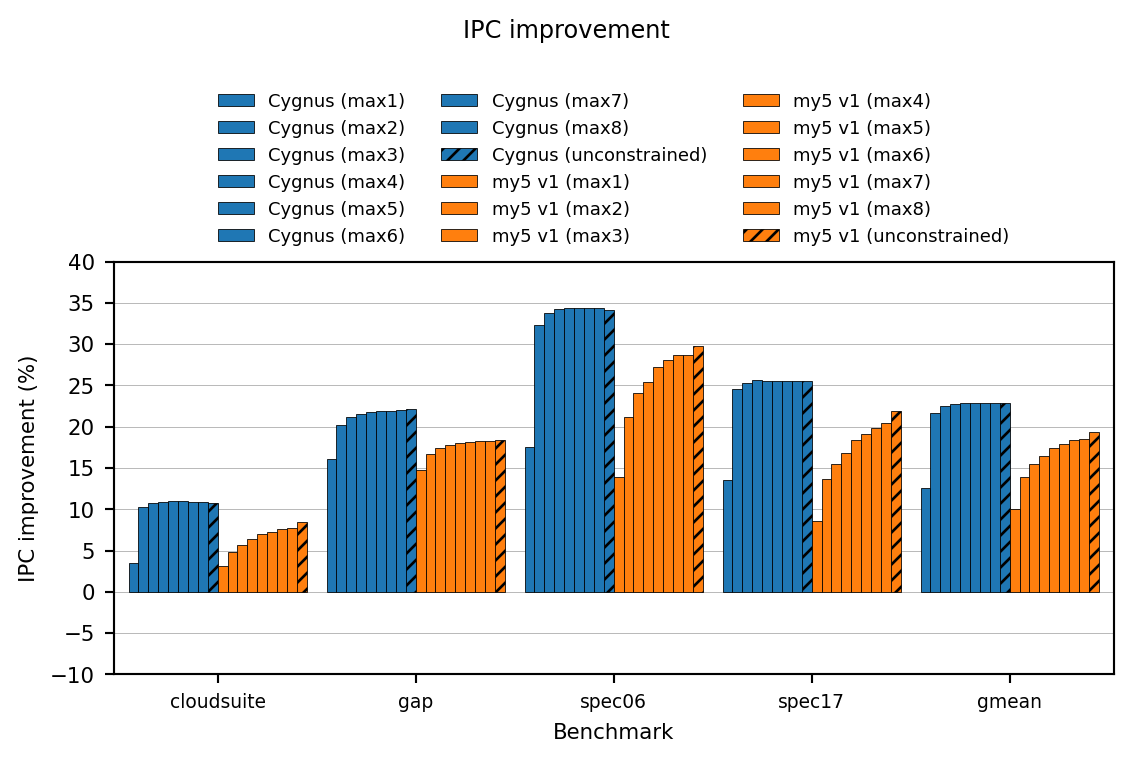

In [7]:
figsize = (6, 4)
ylim = (-10, 40)
ytick_distance = 5

ipc_improvement = tabler_3200.table_statistic_suite(
    "cpu.gmean.ipc_improvement", experiments=experiments, 
    add_mean=True
)

ipc_improvement.display()
ipc_improvement.plot(
    legend_kwargs=legend_kwargs,
    label_kwargs=label_kwargs,
    colors=colors, hatches=hatches,
    add_suptitle=True, suptitle="IPC improvement",
    ylabel="IPC improvement (%)",
    ylim=ylim, ytick_distance=ytick_distance,
    figsize=figsize, dpi=dpi
)
plt.savefig("cygnus_vs_my5_degree/ipc_improvement__3200.png", bbox_inches="tight", dpi=dpi)

#### spec06

,GemsFDTD,astar,bwaves,cactusADM,gcc,lbm,leslie3d,libquantum,mcf,milc,omnetpp,soplex,sphinx3,xalancbmk,zeusmp,gmean
Cygnus (max1),30.706618,6.399252,19.050260,61.513150,8.498653,27.299873,14.422908,23.166180,11.520429,7.450922,4.932077,16.364808,25.571941,5.473798,12.502565,17.578618
Cygnus (max2),75.707744,6.578969,47.134909,66.695603,20.351155,47.695078,30.227600,63.368598,11.096955,13.752371,9.904716,35.065549,58.679115,9.922569,17.521180,32.327193
Cygnus (max3),78.632839,6.635912,48.003659,66.411236,24.790611,48.814457,31.419915,65.179759,10.976836,14.324800,12.342884,38.112720,62.275586,11.063778,17.691110,33.813239
Cygnus (max4),78.950990,6.656359,46.895142,66.184548,28.877503,49.103513,31.491450,64.589989,11.275009,13.638394,13.676296,39.339773,63.081936,11.390898,17.718355,34.256964
Cygnus (max5),79.277557,6.674376,46.366687,66.137153,30.361579,49.571026,31.514177,64.322386,11.162561,12.456920,14.093054,40.114407,63.229284,11.411410,17.774547,34.351285
Cygnus (max6),79.209014,6.701214,45.371115,66.080886,31.440198,49.783938,31.328356,65.269642,11.666061,11.732695,14.501769,40.536198,62.914638,11.335854,17.779336,34.429900
Cygnus (max7),78.870189,6.655025,44.935448,66.017706,31.894966,49.917779,31.203768,64.969225,11.940323,11.228577,14.724975,41.051369,62.499846,11.334168,17.775618,34.401339
Cygnus (max8),78.577413,6.689156,44.633054,66.028825,32.215106,50.088941,31.108368,66.014022,11.582192,10.552833,14.829923,41.172519,62.190389,11.299945,17.913197,34.376612
Cygnus (unconstrained),78.112278,6.647592,43.486044,66.101280,32.507038,50.488014,30.867163,66.853207,11.826420,8.870268,14.764347,41.223772,61.485769,11.040509,17.676003,34.157117
my5 v1 (max1),29.057140,1.133535,17.180671,30.687738,9.863884,1.692482,12.899572,23.298464,24.075874,9.571378,6.581205,10.886484,20.046355,4.832181,12.011552,13.895735


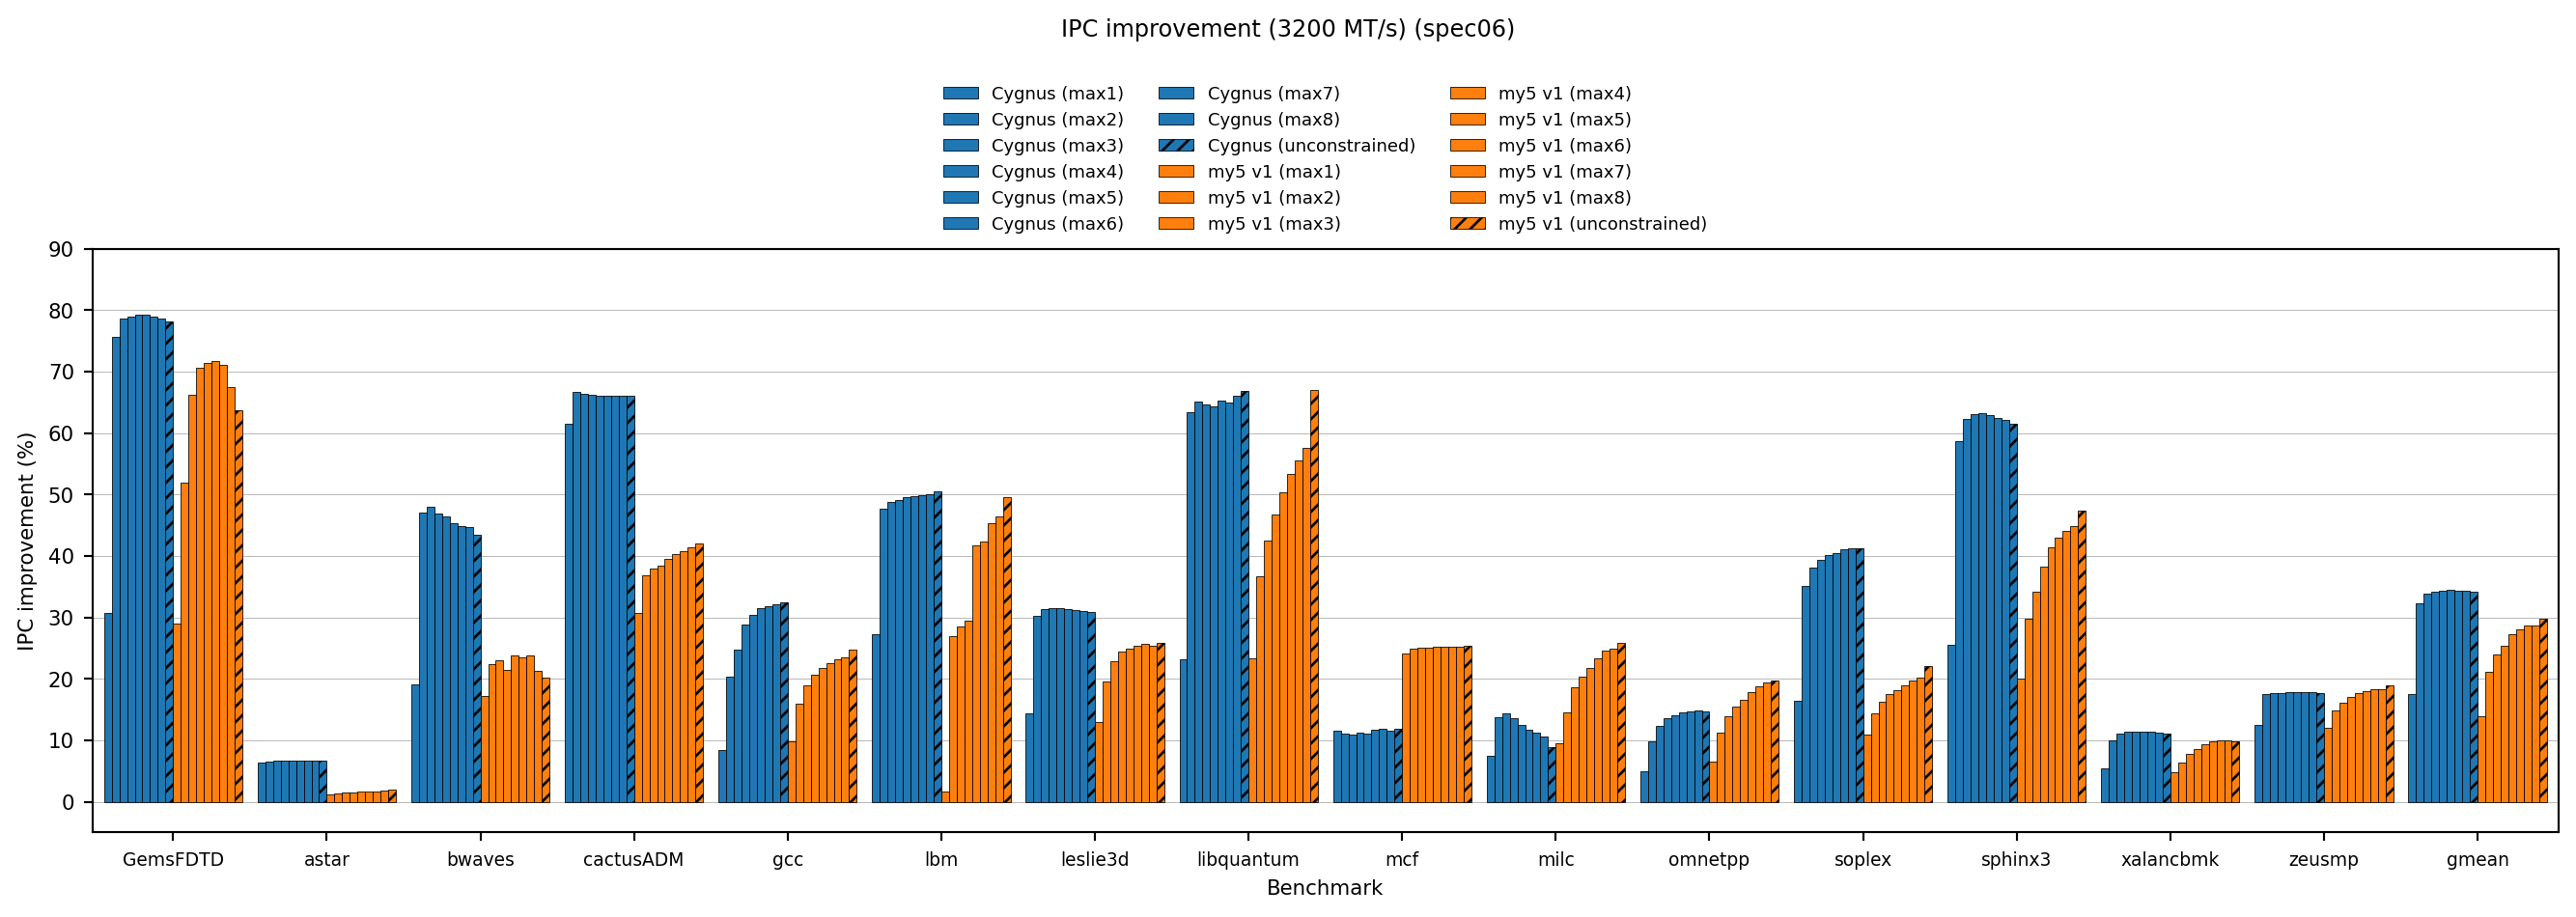

In [8]:
suite = "spec06"
bandwidth = 3200

tabler = tabler_3200 if bandwidth == 3200 else tabler_200
figsize = (14, 5)
ylim = (-5, 90)
ytick_distance = 10
ylabel = "IPC improvement (%)"
suptitle = f"IPC improvement ({bandwidth} MT/s) ({suite})"

process_suite(tabler, bandwidth, "cpu.gmean.ipc_improvement", suite, 
              figsize=figsize, ylim=ylim, ytick_distance=ytick_distance,
              ylabel=ylabel, suptitle=suptitle)

#### spec17

,602.gcc,605.mcf,607.cactuBSSN,619.lbm,620.omnetpp,623.xalancbmk,627.cam4,628.pop2,649.fotonik3d,gmean
Cygnus (max1),47.827930,4.613306,28.427411,13.022648,5.309581,4.278575,0.901371,6.517926,18.387759,13.543374
Cygnus (max2),66.278244,8.103724,28.929253,21.375808,7.185854,11.792542,1.622029,16.903547,80.798726,24.601866
Cygnus (max3),66.748637,7.916655,28.655732,21.810719,7.926910,12.005671,2.220766,18.013200,85.499371,25.328460
Cygnus (max4),66.846310,7.695927,28.937539,21.991865,8.607481,11.922855,2.179028,18.477284,87.401755,25.627908
Cygnus (max5),66.965171,7.494314,28.807716,22.131540,8.758171,11.802719,2.161842,18.433864,87.007056,25.581081
Cygnus (max6),66.974131,7.360644,28.993615,22.257543,8.767492,11.814067,2.416712,18.361209,86.632114,25.599793
Cygnus (max7),66.980837,7.207128,28.752498,22.333196,8.972037,11.624187,2.477526,18.518502,86.466981,25.579874
Cygnus (max8),66.924271,7.085266,28.758727,22.435793,8.956234,11.625749,2.205707,18.391962,86.248695,25.501535
Cygnus (unconstrained),66.731995,6.733695,28.868049,22.644127,9.373423,11.418051,2.345705,18.368821,86.030321,25.502473
my5 v1 (max1),46.268103,5.126014,1.398570,1.317478,4.717640,4.532403,0.320075,3.346968,16.732999,8.551599


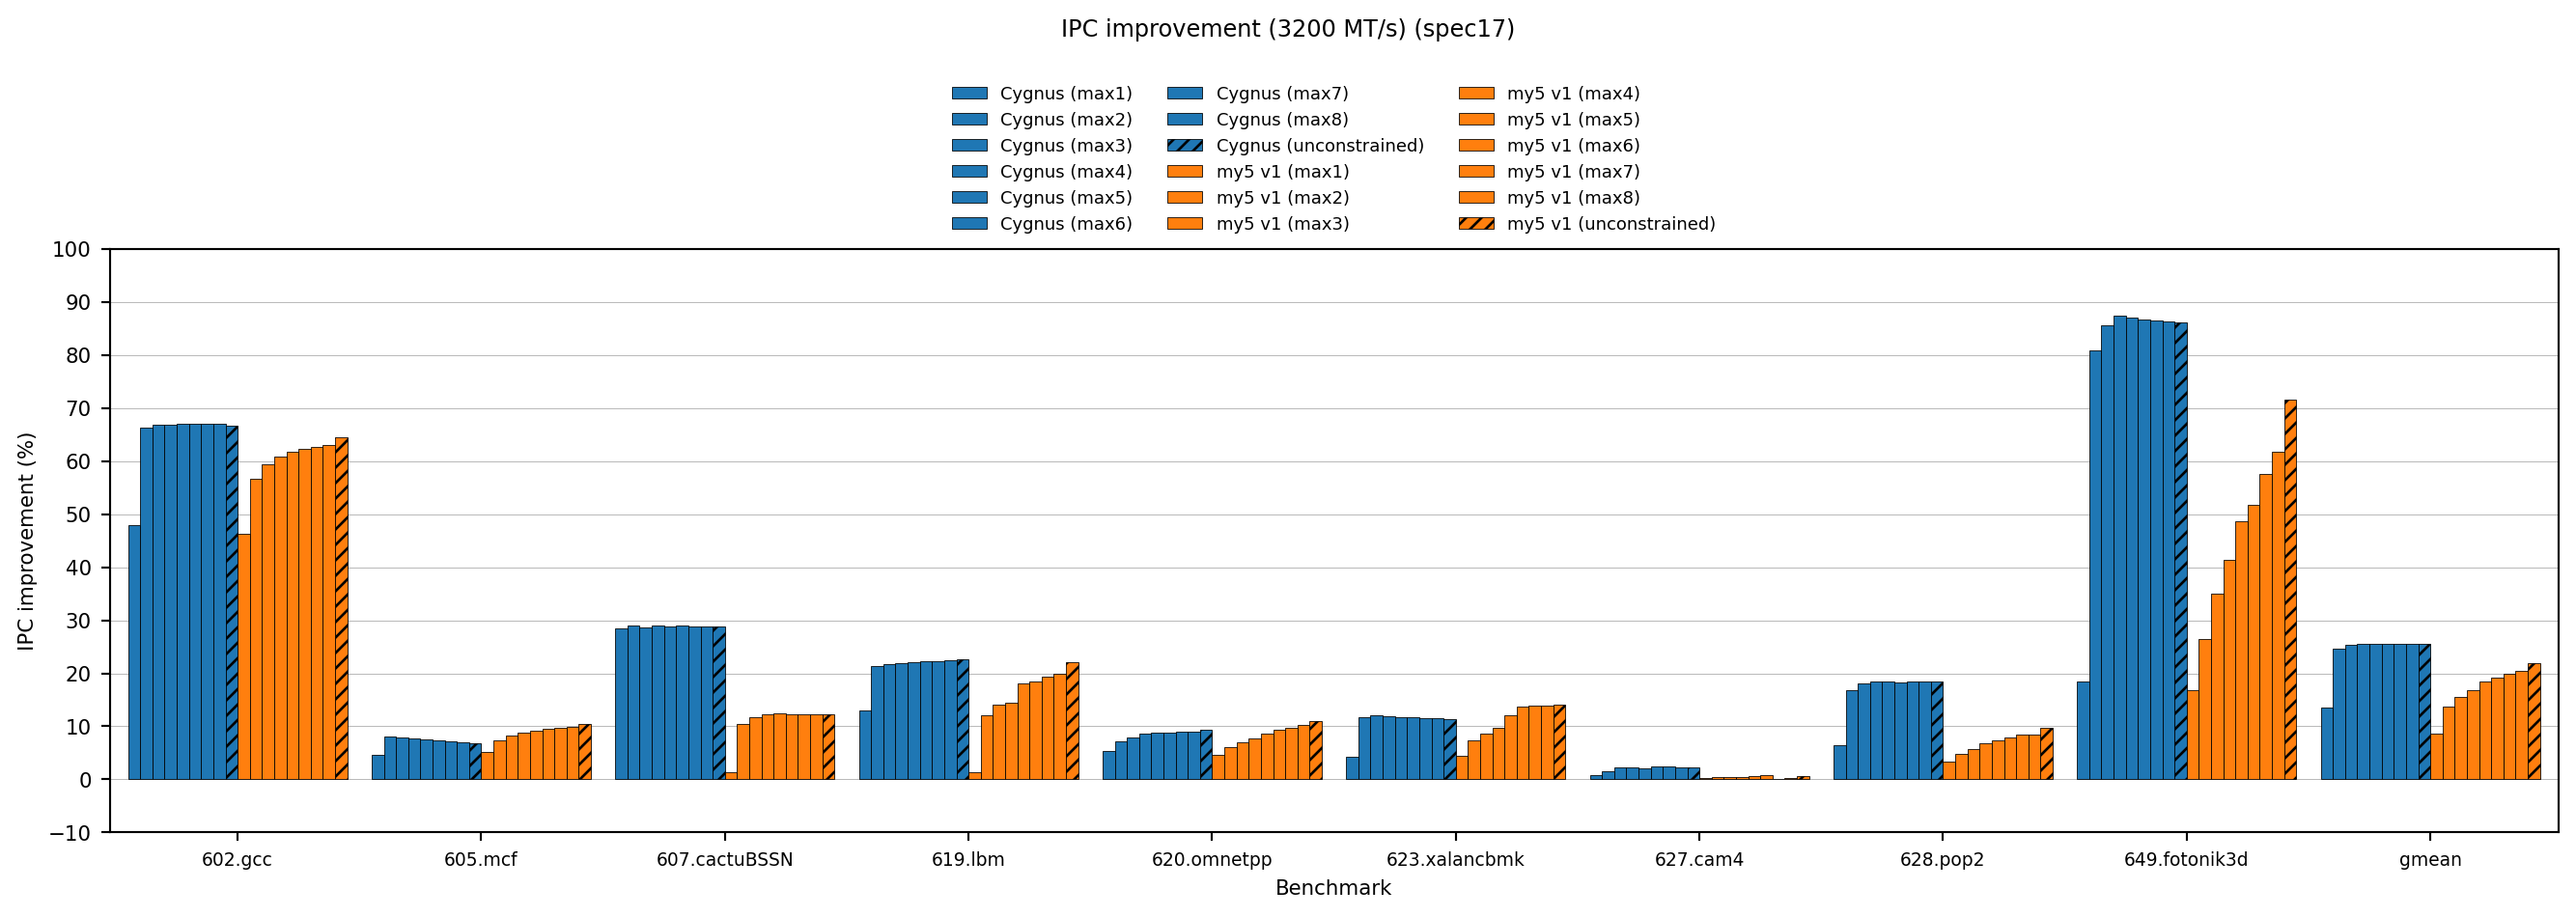

In [9]:
suite = "spec17"
bandwidth = 3200

tabler = tabler_3200 if bandwidth == 3200 else tabler_200
figsize = (14, 5)
ylim = (-10, 100)
ytick_distance = 10
ylabel = "IPC improvement (%)"
suptitle = f"IPC improvement ({bandwidth} MT/s) ({suite})"

process_suite(tabler, bandwidth, "cpu.gmean.ipc_improvement", suite, 
              figsize=figsize, ylim=ylim, ytick_distance=ytick_distance,
              ylabel=ylabel, suptitle=suptitle)

#### gap

,bc,bfs,cc,pr,sssp,tc,gmean
Cygnus (max1),9.671934,35.288663,27.827456,1.277484,5.909327,20.394688,16.101879
Cygnus (max2),11.588686,51.259496,34.610541,2.411994,8.197198,20.142489,20.258068
Cygnus (max3),11.721556,57.068654,34.817007,2.573991,8.146403,20.570483,21.164925
Cygnus (max4),11.811057,59.476993,34.866269,2.657083,8.278970,20.788162,21.573968
Cygnus (max5),11.898807,60.715062,34.898233,2.697055,8.189322,20.889664,21.759627
Cygnus (max6),11.938305,61.426760,34.919458,2.722496,8.198870,20.970954,21.880167
Cygnus (max7),11.894987,61.972767,34.902885,2.759229,8.210882,21.032317,21.958245
Cygnus (max8),11.916901,62.391777,34.978657,2.768223,8.154654,21.032017,22.017332
Cygnus (unconstrained),11.938550,63.083605,34.987449,2.785289,8.210877,21.084317,22.131828
my5 v1 (max1),8.117740,33.391534,27.400184,0.558660,2.813014,20.368913,14.779113


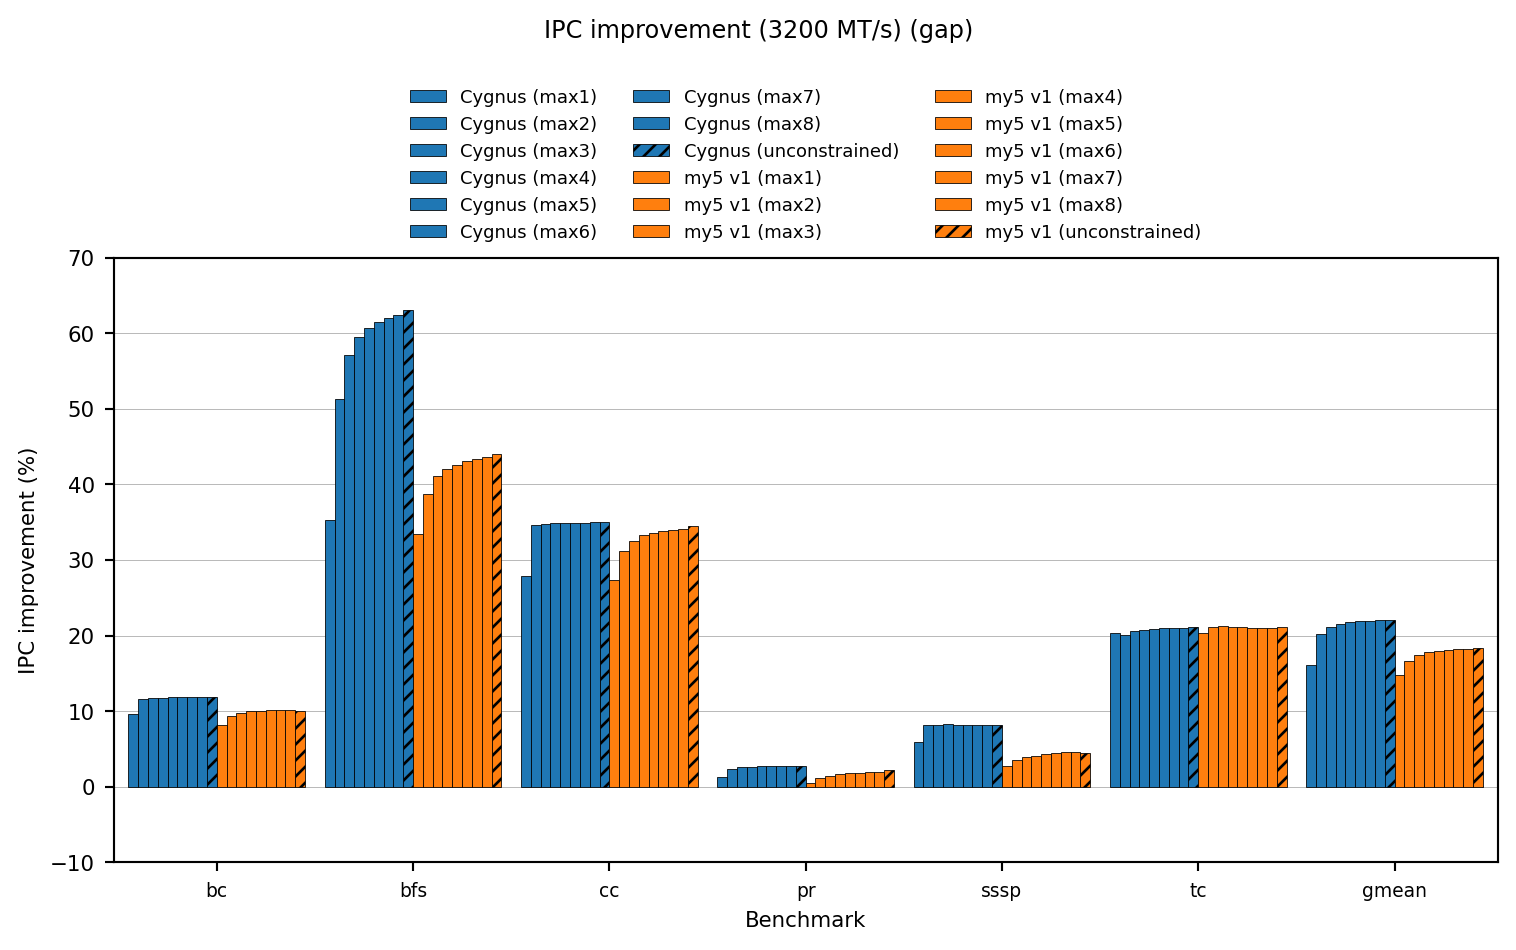

In [10]:
suite = "gap"
bandwidth = 3200

tabler = tabler_3200 if bandwidth == 3200 else tabler_200
figsize = (8, 5)
ylim = (-10, 70)
ytick_distance = 10
ylabel = "IPC improvement (%)"
suptitle = f"IPC improvement ({bandwidth} MT/s) ({suite})"

process_suite(tabler, bandwidth, "cpu.gmean.ipc_improvement", suite, 
              figsize=figsize, ylim=ylim, ytick_distance=ytick_distance,
              ylabel=ylabel, suptitle=suptitle)

#### cloudsuite

,cassandra,classifcation,cloud9,nutch,gmean
Cygnus (max1),7.270530,-9.880836,11.147847,6.714192,3.479710
Cygnus (max2),12.124627,-9.512471,21.291660,20.367397,10.320796
Cygnus (max3),11.994063,-9.766241,23.500088,20.812125,10.811660
Cygnus (max4),11.649674,-9.932230,24.493305,20.941339,10.926909
Cygnus (max5),11.342395,-10.042175,25.055029,21.004355,10.955904
Cygnus (max6),11.146560,-10.169295,25.470049,20.958037,10.949132
Cygnus (max7),11.022357,-10.273429,25.712383,20.944422,10.936345
Cygnus (max8),10.857774,-10.326437,25.958962,20.892268,10.921196
Cygnus (unconstrained),10.472271,-10.545401,26.296021,20.771383,10.803229
my5 v1 (max1),6.684536,-0.917368,2.722406,4.258201,3.149851


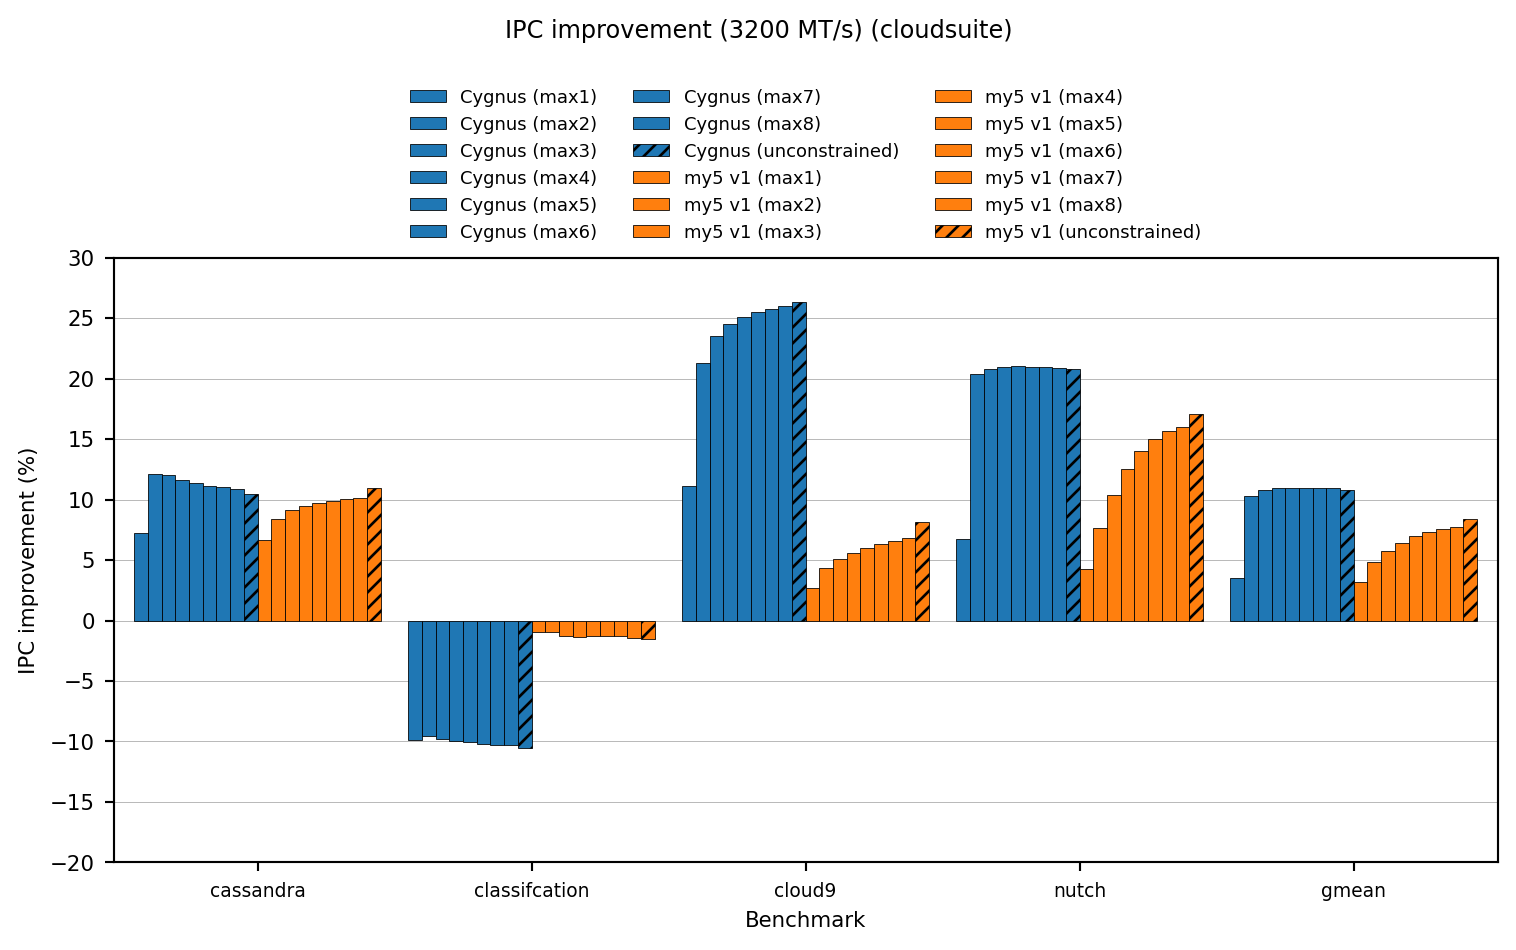

In [11]:
suite = "cloudsuite"
bandwidth = 3200

tabler = tabler_3200 if bandwidth == 3200 else tabler_200
figsize = (8, 5)
ylim = (-20, 30)
ytick_distance = 5
ylabel = "IPC improvement (%)"
suptitle = f"IPC improvement ({bandwidth} MT/s) ({suite})"

process_suite(tabler, bandwidth, "cpu.gmean.ipc_improvement", suite, 
              figsize=figsize, ylim=ylim, ytick_distance=ytick_distance,
              ylabel=ylabel, suptitle=suptitle)

# 200 MT/s

## IPC improvement

### spec06

,GemsFDTD,astar,bwaves,cactusADM,gcc,lbm,leslie3d,libquantum,mcf,milc,omnetpp,soplex,sphinx3,xalancbmk,zeusmp,gmean
Cygnus (max1),0.066293,7.934768,8.044436,28.419975,7.261949,4.770234,2.357496,14.578528,2.332549,-3.809556,-4.472257,-0.331758,5.121796,1.897997,11.729109,5.445932
Cygnus (max2),-0.829480,8.527172,11.723456,30.268198,8.530186,5.372994,2.860478,20.701552,2.269913,-9.288510,-13.251902,-4.201868,-6.316858,-0.907708,22.744992,4.566320
Cygnus (max3),-1.018623,8.528465,11.903525,30.698311,5.082115,5.464810,2.775572,20.612948,2.406854,-11.573125,-17.261206,-7.196934,-13.594350,-4.638229,23.671492,2.872698
Cygnus (max4),-1.242026,8.426790,11.896803,30.820396,2.931465,5.494393,2.714348,20.485157,2.354009,-13.227465,-18.883056,-8.802385,-17.582950,-6.762093,24.079694,1.865966
Cygnus (max5),-1.365895,8.290484,11.930140,30.845506,1.267781,5.541936,2.696605,20.524011,2.327648,-14.048788,-19.936561,-9.716659,-19.728207,-8.005758,24.179440,1.259077
Cygnus (max6),-1.481880,8.050408,11.928526,30.889610,0.315758,5.572195,2.683149,20.693360,2.304354,-14.512803,-20.437604,-10.349418,-21.019781,-8.980182,24.232943,0.879394
Cygnus (max7),-1.588831,7.852192,11.900555,30.915660,-0.292501,5.585382,2.671077,20.636166,2.353954,-14.816357,-20.772102,-10.742214,-21.789668,-9.590910,24.341112,0.631829
Cygnus (max8),-1.662973,7.708839,11.886376,30.913244,-0.648967,5.600573,2.656417,20.698890,2.277411,-15.146355,-20.623856,-11.023318,-22.323610,-10.231096,24.138154,0.452233
Cygnus (unconstrained),-1.856822,6.605782,11.825902,30.909982,-1.065679,5.593932,2.674754,20.707032,2.451890,-15.998024,-21.145583,-11.379500,-22.934887,-11.867596,23.933781,0.025962
my5 v1 (max1),0.979215,1.849992,7.355688,17.246918,9.782819,2.198863,2.469167,14.546854,17.067488,2.443492,3.544066,-0.246724,6.295623,3.628437,11.687070,6.571997


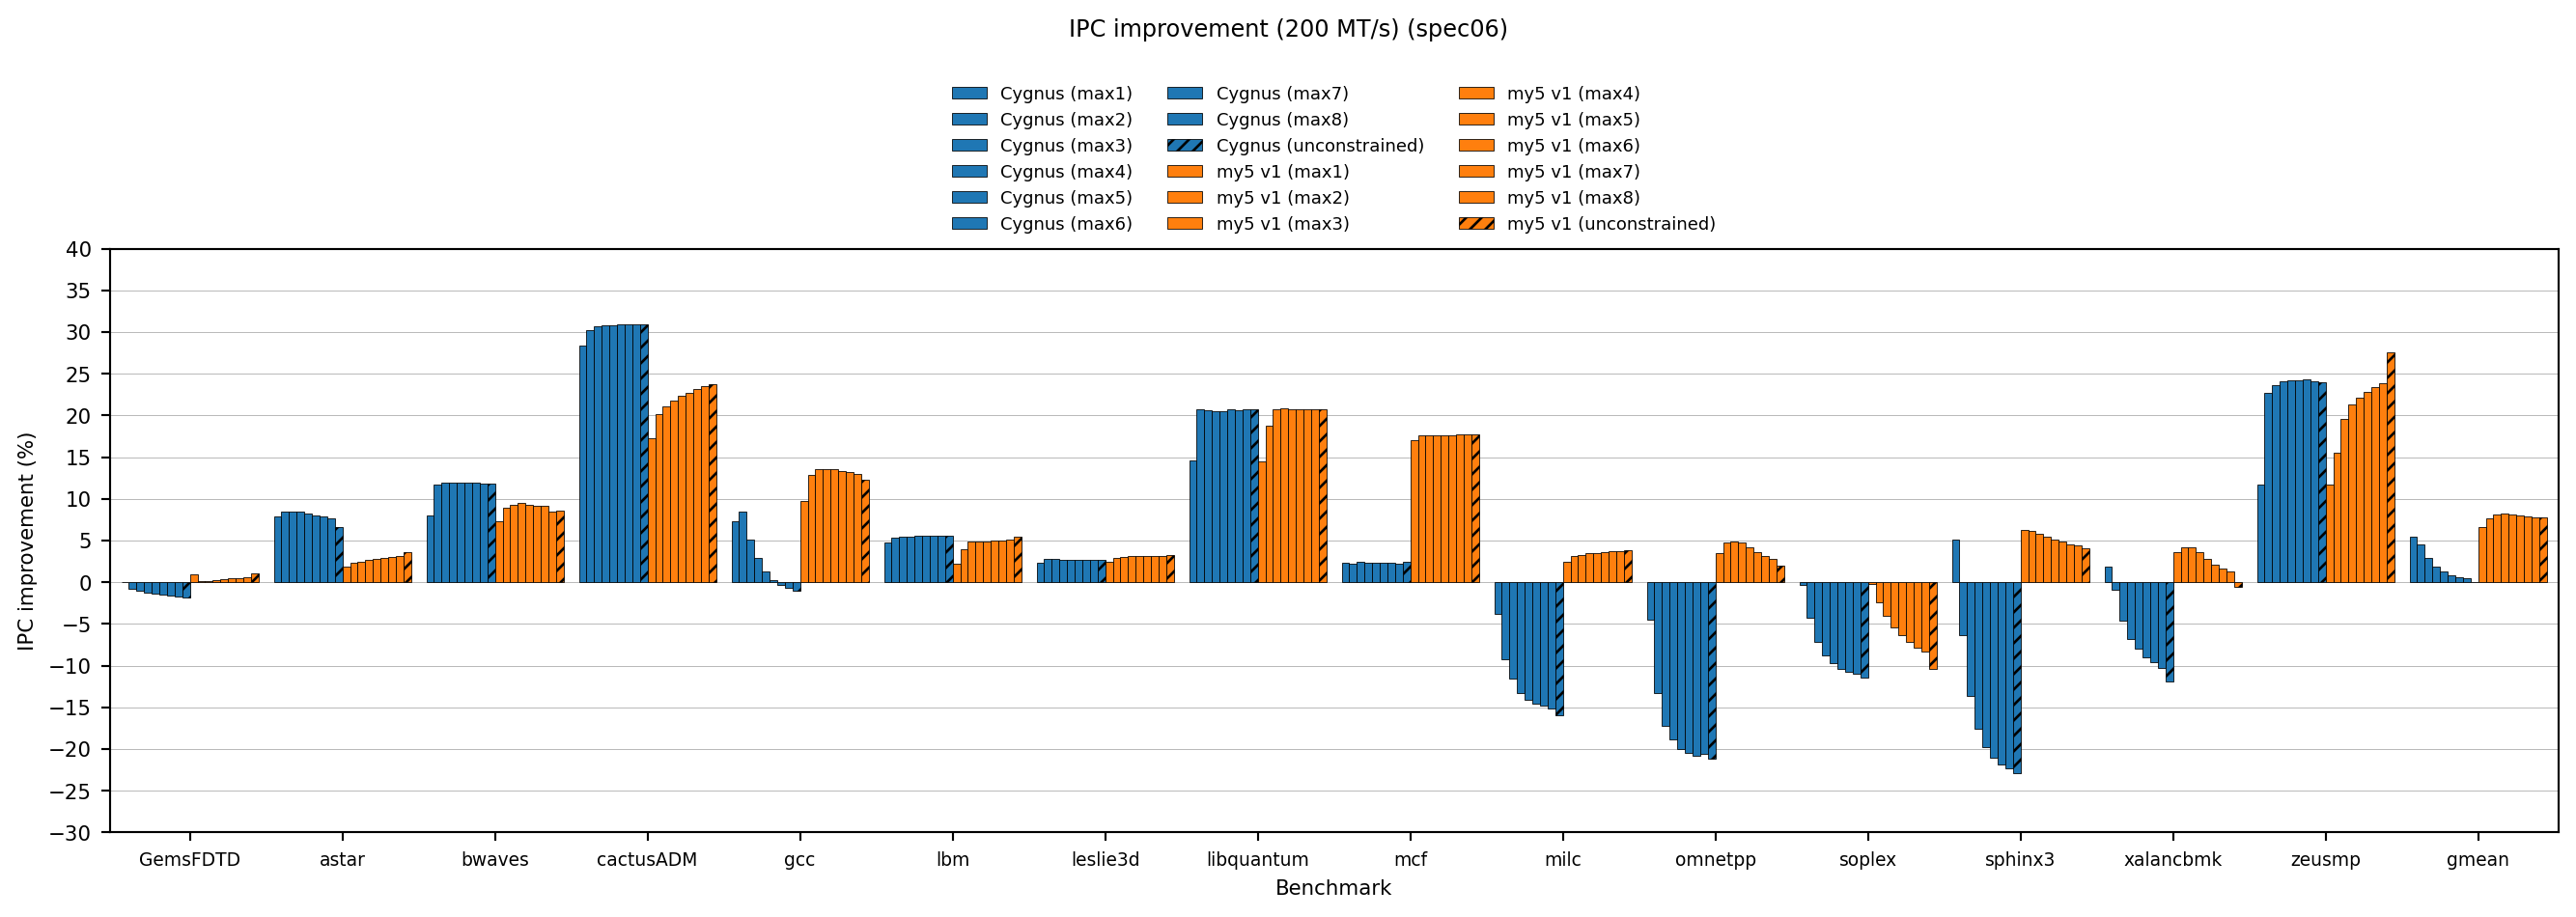

In [12]:
suite = "spec06"
bandwidth = 200

tabler = tabler_3200 if bandwidth == 3200 else tabler_200
figsize = (14, 5)
ylim = (-30, 40)
ytick_distance = 5
ylabel = "IPC improvement (%)"
suptitle = f"IPC improvement ({bandwidth} MT/s) ({suite})"

process_suite(tabler, bandwidth, "cpu.gmean.ipc_improvement", suite, 
              figsize=figsize, ylim=ylim, ytick_distance=ytick_distance,
              ylabel=ylabel, suptitle=suptitle)

### spec17

,602.gcc,605.mcf,607.cactuBSSN,619.lbm,620.omnetpp,623.xalancbmk,627.cam4,628.pop2,649.fotonik3d,gmean
Cygnus (max1),67.348092,-7.487176,1.791918,2.030965,0.070288,4.854581,0.330981,4.066174,2.658975,6.804395
Cygnus (max2),100.105274,-10.094571,1.838397,2.604566,-6.644312,7.049907,0.491679,7.339883,3.048164,8.525364
Cygnus (max3),98.072386,-11.186055,1.762750,2.669429,-9.182114,6.961582,0.518283,7.314243,2.984041,7.905898
Cygnus (max4),94.938902,-12.055662,1.815010,2.699981,-10.536012,6.695262,0.396773,7.170483,2.910183,7.358701
Cygnus (max5),92.822051,-12.740671,1.794127,2.732525,-11.343397,6.565193,0.338955,6.909823,2.889994,6.976242
Cygnus (max6),91.665374,-13.324699,1.894175,2.741937,-12.045407,6.513734,0.186652,6.705764,2.846235,6.691992
Cygnus (max7),90.668205,-13.907398,1.850050,2.760726,-12.106663,6.227994,0.177966,6.464141,2.806674,6.474877
Cygnus (max8),90.328423,-14.255304,1.748897,2.764574,-12.097545,6.252482,0.216225,6.356877,2.779393,6.388000
Cygnus (unconstrained),88.397736,-15.294105,1.796460,2.767946,-11.818766,5.985666,0.166903,5.994184,2.710117,6.083281
my5 v1 (max1),64.625375,7.463164,0.767810,0.838993,4.461378,6.274470,0.230719,1.836826,1.446632,8.399202


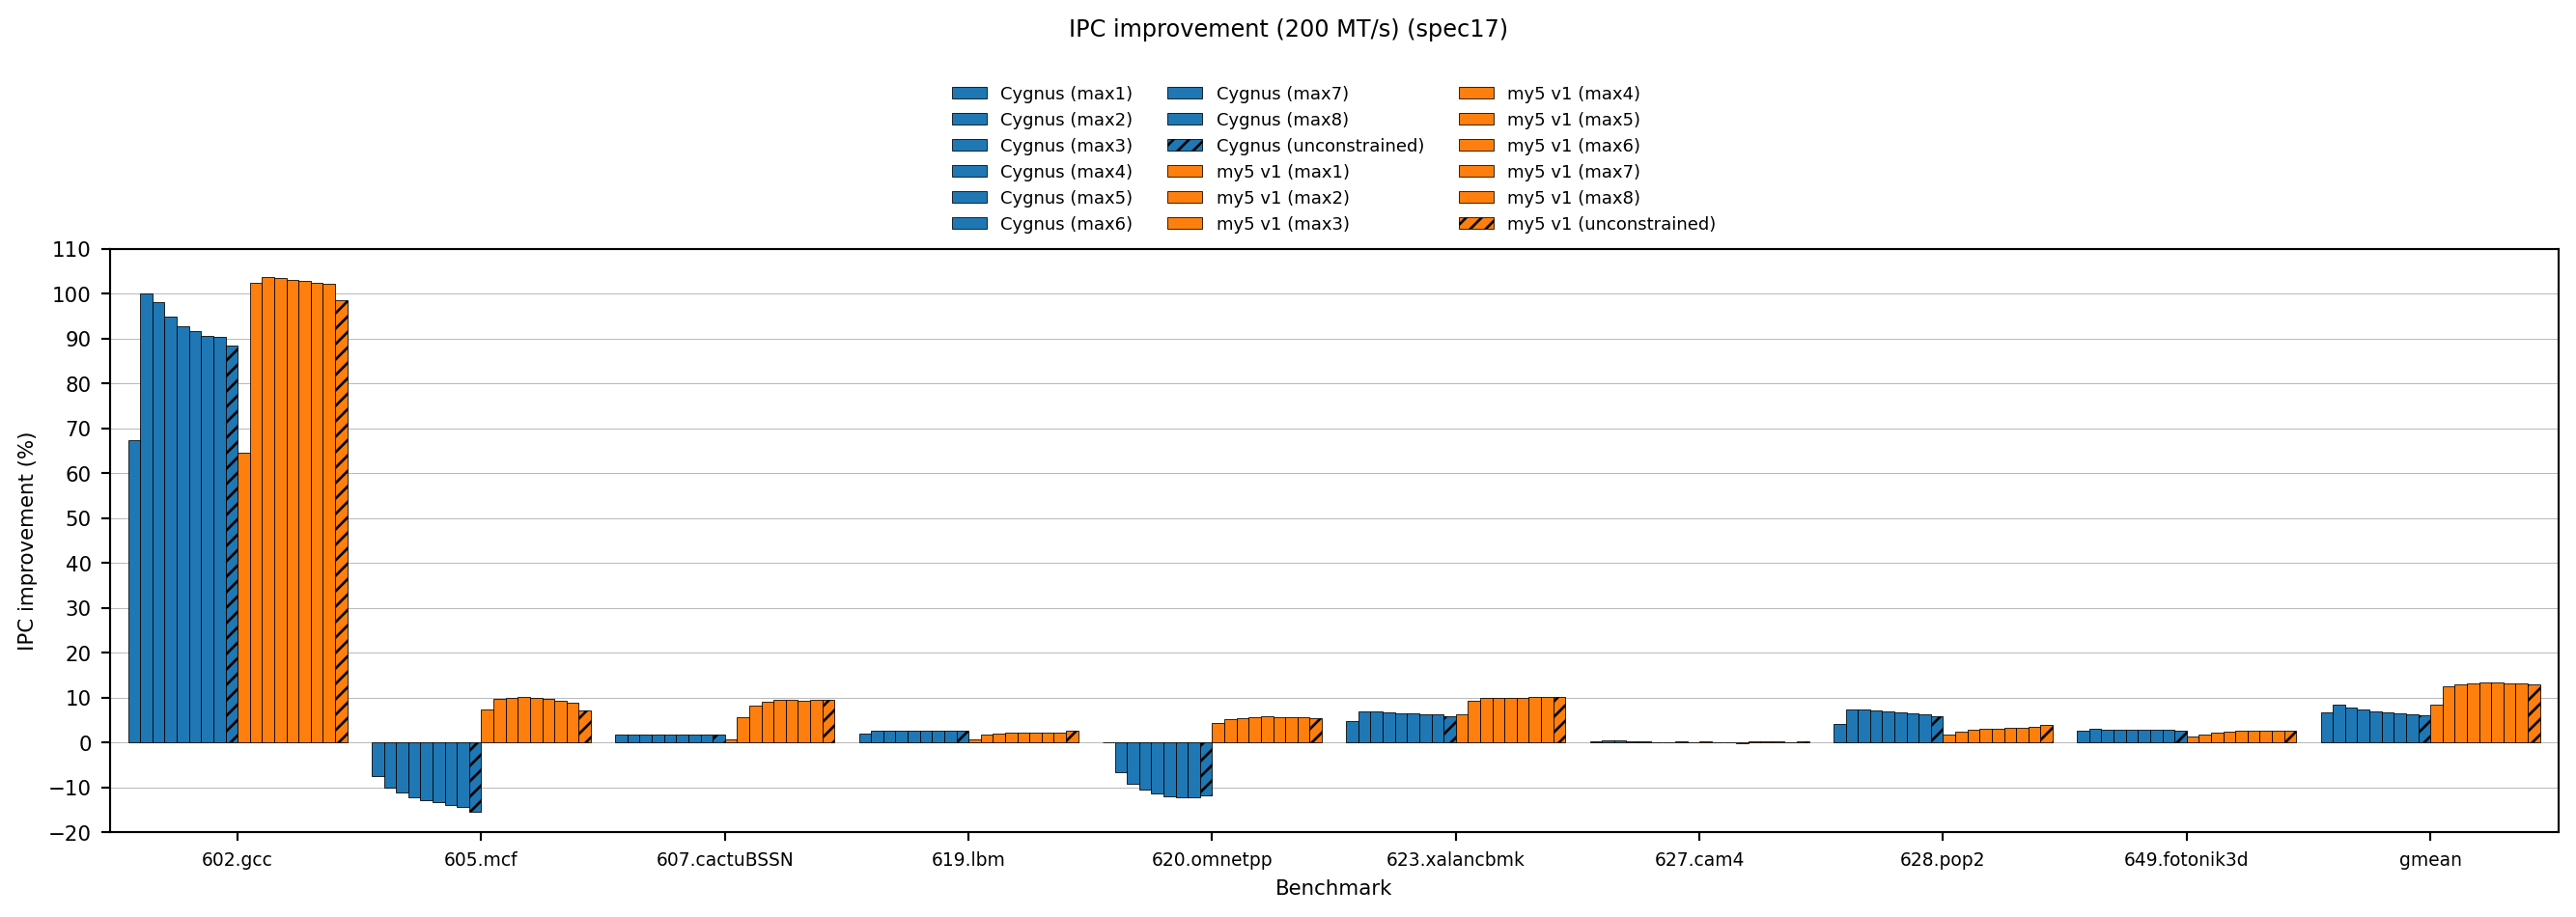

In [20]:
suite = "spec17"
bandwidth = 200

tabler = tabler_3200 if bandwidth == 3200 else tabler_200
figsize = (14, 5)
ylim = (-20, 110)
ytick_distance = 10
ylabel = "IPC improvement (%)"
suptitle = f"IPC improvement ({bandwidth} MT/s) ({suite})"

process_suite(tabler, bandwidth, "cpu.gmean.ipc_improvement", suite, 
              figsize=figsize, ylim=ylim, ytick_distance=ytick_distance,
              ylabel=ylabel, suptitle=suptitle)

### gap

,bc,bfs,cc,pr,sssp,tc,gmean
Cygnus (max1),14.554744,39.766928,60.295208,4.392317,9.360226,37.969781,26.214231
Cygnus (max2),13.035708,34.034852,81.880607,7.770570,3.224976,39.291392,27.371278
Cygnus (max3),11.472961,19.496219,82.234864,7.879430,0.535871,39.581481,24.224458
Cygnus (max4),10.424259,12.413502,82.282613,7.944711,-0.377873,39.897903,22.649590
Cygnus (max5),9.907518,8.494457,82.326993,8.029314,-1.011679,39.825334,21.711858
Cygnus (max6),9.539154,6.065580,82.330539,8.019029,-1.407847,39.937461,21.119289
Cygnus (max7),9.467582,4.213564,82.279895,8.040713,-1.564936,40.056567,20.734544
Cygnus (max8),9.297577,2.940377,82.312123,8.098256,-1.580074,40.032018,20.463872
Cygnus (unconstrained),9.465663,-0.040278,82.362460,8.089628,-1.722509,40.275800,19.915836
my5 v1 (max1),14.212386,40.074842,59.038068,2.770910,6.952881,37.857382,25.221199


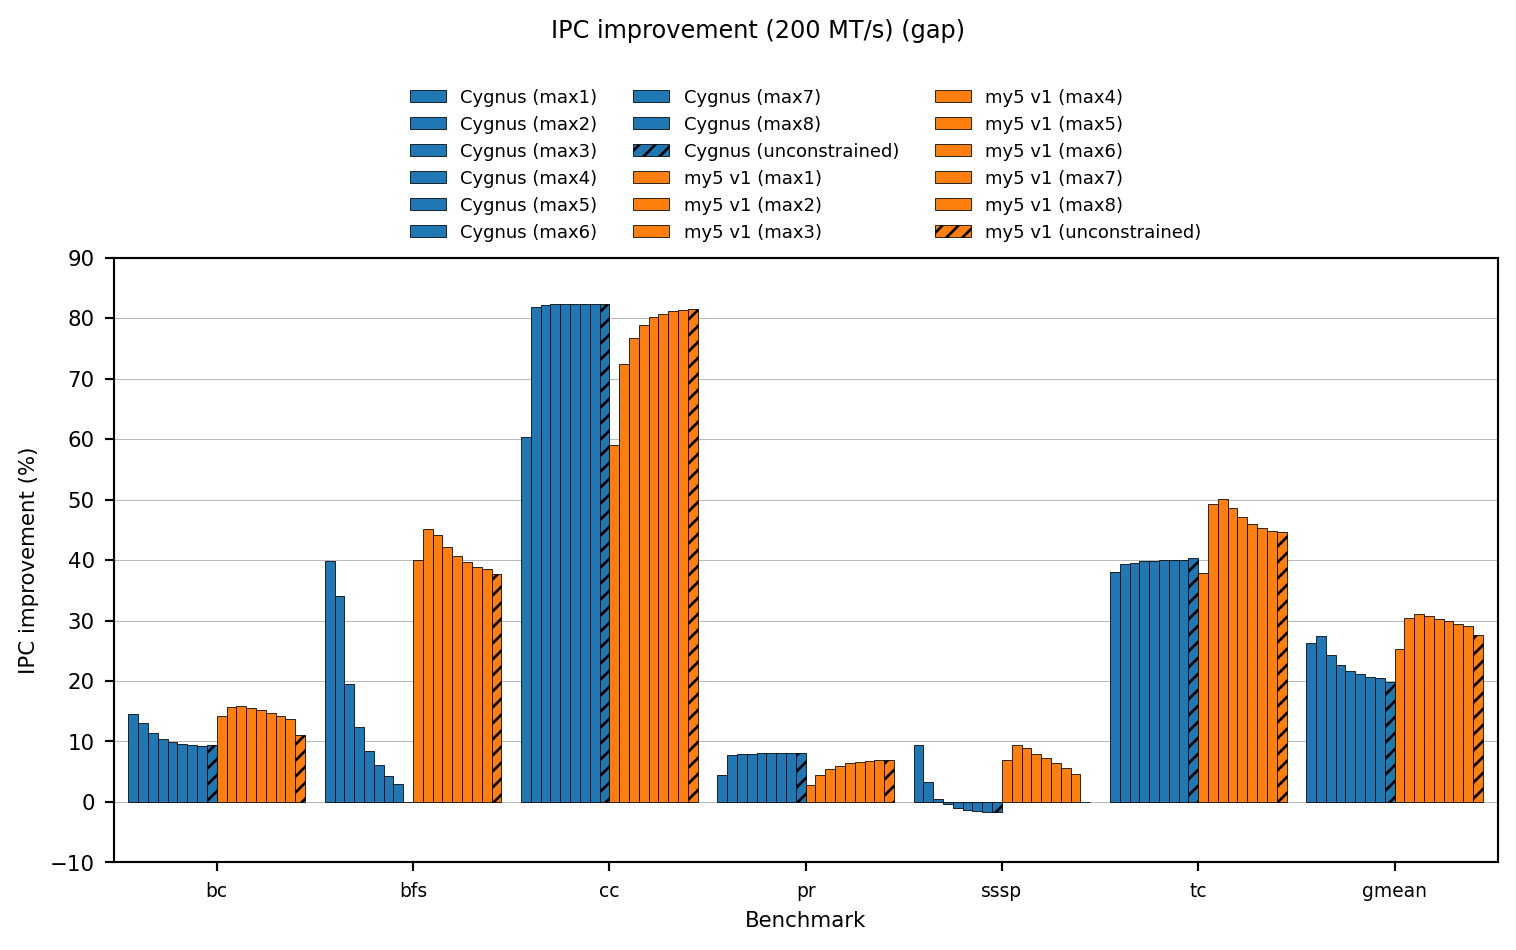

In [14]:
suite = "gap"
bandwidth = 200

tabler = tabler_3200 if bandwidth == 3200 else tabler_200
figsize = (8, 5)
ylim = (-10, 90)
ytick_distance = 10
ylabel = "IPC improvement (%)"
suptitle = f"IPC improvement ({bandwidth} MT/s) ({suite})"

process_suite(tabler, bandwidth, "cpu.gmean.ipc_improvement", suite, 
              figsize=figsize, ylim=ylim, ytick_distance=ytick_distance,
              ylabel=ylabel, suptitle=suptitle)

### cloudsuite

,cassandra,classifcation,cloud9,nutch,gmean
Cygnus (max1),-1.202572,-20.765305,9.323503,9.093186,-1.702370
Cygnus (max2),-6.649221,-23.409639,17.331384,19.228258,0.004919
Cygnus (max3),-12.051199,-25.943939,16.312205,16.798245,-3.013110
Cygnus (max4),-15.447038,-27.719071,14.908206,15.078006,-5.185670
Cygnus (max5),-17.660041,-28.764882,13.784120,13.943976,-6.616649
Cygnus (max6),-19.222069,-29.483176,12.857128,13.138333,-7.651242
Cygnus (max7),-20.360481,-30.019006,12.101602,12.654520,-8.405943
Cygnus (max8),-21.016713,-30.404926,11.461218,12.292337,-8.925478
Cygnus (unconstrained),-22.676473,-31.459317,9.612453,11.450035,-10.298429
my5 v1 (max1),5.241548,-3.370966,1.945913,6.880113,2.598355


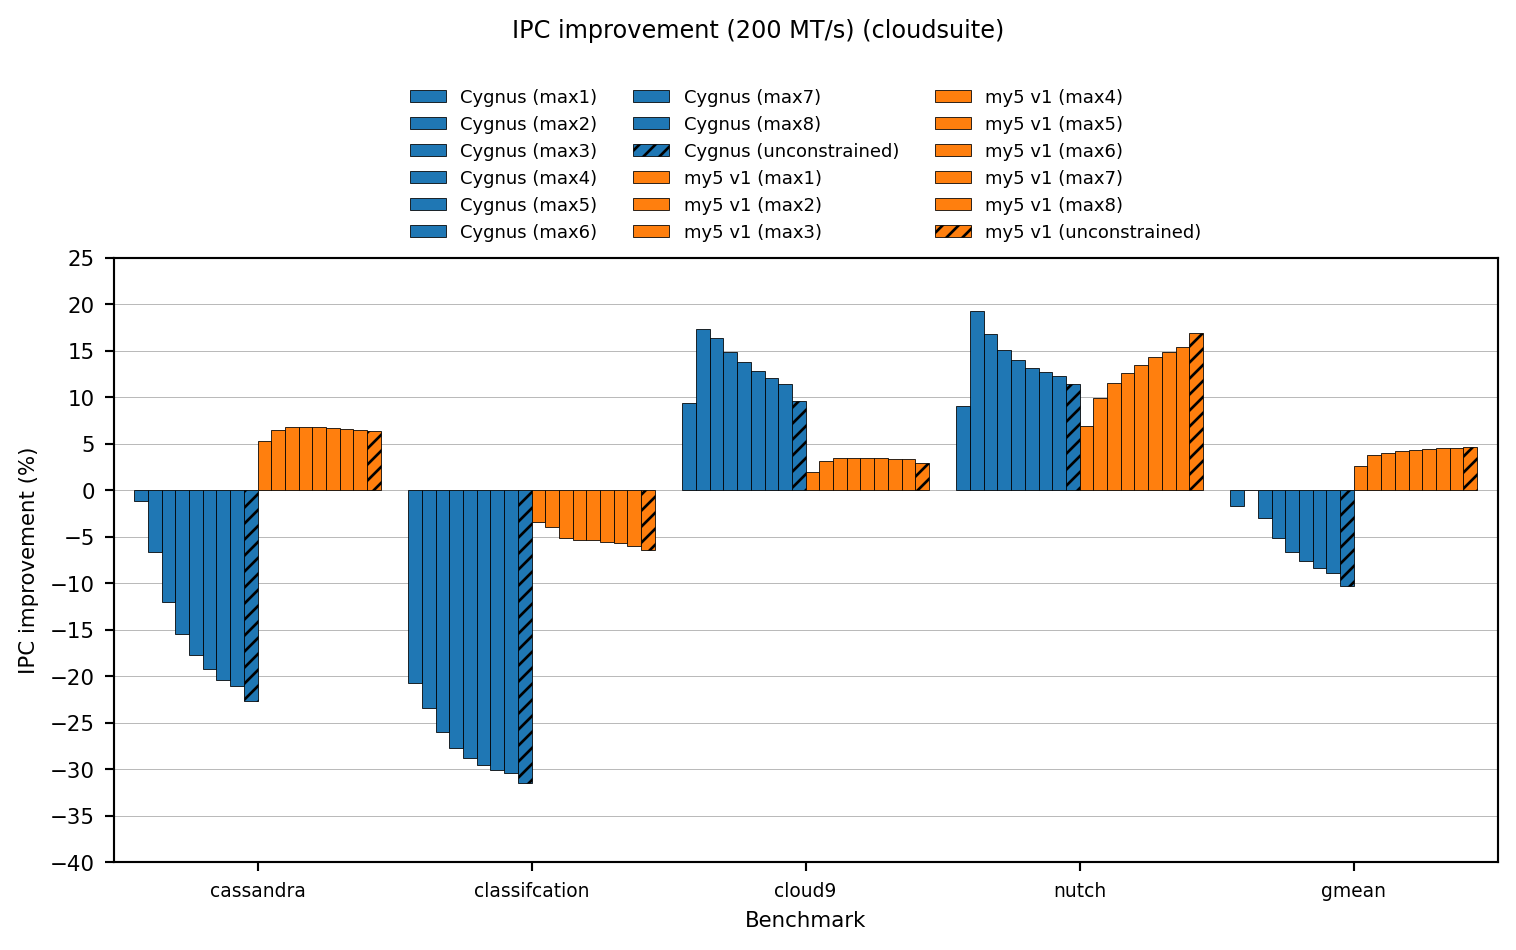

In [15]:
suite = "cloudsuite"
bandwidth = 200

tabler = tabler_3200 if bandwidth == 3200 else tabler_200
figsize = (8, 5)
ylim = (-40, 25)
ytick_distance = 5
ylabel = "IPC improvement (%)"
suptitle = f"IPC improvement ({bandwidth} MT/s) ({suite})"

process_suite(tabler, bandwidth, "cpu.gmean.ipc_improvement", suite, 
              figsize=figsize, ylim=ylim, ytick_distance=ytick_distance,
              ylabel=ylabel, suptitle=suptitle)

# Benchmark analysis

## sphinx3

,sphinx3_1339B,sphinx3_2520B,sphinx3_883B,gmean
Cygnus (max1),25.817042,23.496621,28.741732,26.000218
Cygnus (max2),60.626356,55.576604,61.347922,59.162771
Cygnus (max3),64.946595,57.877007,66.226483,62.974936
Cygnus (max4),66.210474,57.914406,67.771946,63.907878
Cygnus (max5),66.404188,57.789996,68.334942,64.111619
Cygnus (max6),66.261649,57.136995,68.390534,63.856145
Cygnus (max7),65.993115,56.494775,68.186131,63.478270
Cygnus (max8),65.607515,56.248711,67.865429,63.162086
Cygnus (unconstrained),65.057792,55.183076,67.598906,62.523883
my5 v1 (max1),20.028814,18.567753,22.546885,20.369963


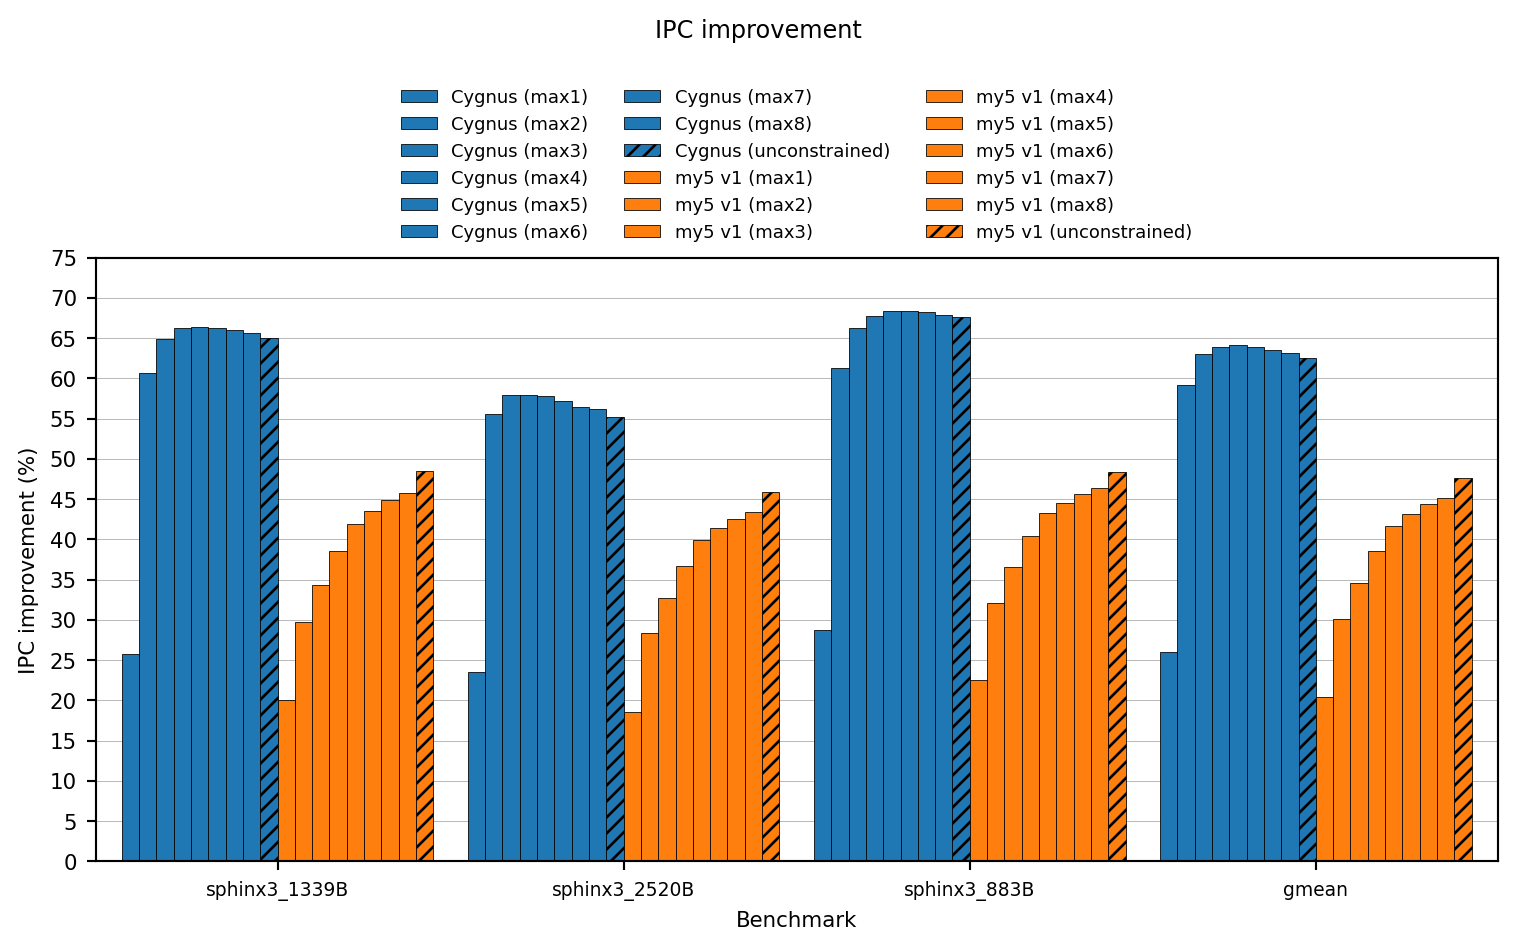

In [16]:
ipc_improvement__3200__sphinx3 = tabler_3200.table_statistic_mix(
    "cpu.gmean.ipc_improvement", experiments=experiments, add_mean=True,
    benchmarks={"sphinx3"})

ipc_improvement__3200__sphinx3.display()

ipc_improvement__3200__sphinx3.plot(
    legend_kwargs=legend_kwargs,
    label_kwargs=label_kwargs,
    colors=colors, hatches=hatches,
    add_suptitle=True, suptitle="IPC improvement",
    ylabel="IPC improvement (%)",
    ylim=(0, 75), ytick_distance=5,
    figsize=figsize, dpi=dpi
)

,sphinx3_1339B,sphinx3_2520B,sphinx3_883B,gmean
Cygnus (max1),6.108388,2.989401,7.419856,5.489428
Cygnus (max2),-4.666664,-7.961916,-5.707240,-6.122056
Cygnus (max3),-11.582581,-15.366340,-13.229443,-13.406669
Cygnus (max4),-15.525440,-19.495106,-17.035857,-17.368389
Cygnus (max5),-17.686998,-21.639811,-19.159299,-19.511964
Cygnus (max6),-18.930840,-22.952614,-20.474481,-20.803371
Cygnus (max7),-19.690755,-23.695040,-21.303026,-21.580251
Cygnus (max8),-20.242625,-24.185049,-21.888242,-22.122134
Cygnus (unconstrained),-20.845765,-24.772393,-22.549915,-22.739455
my5 v1 (max1),6.692229,5.629882,6.883008,6.400275


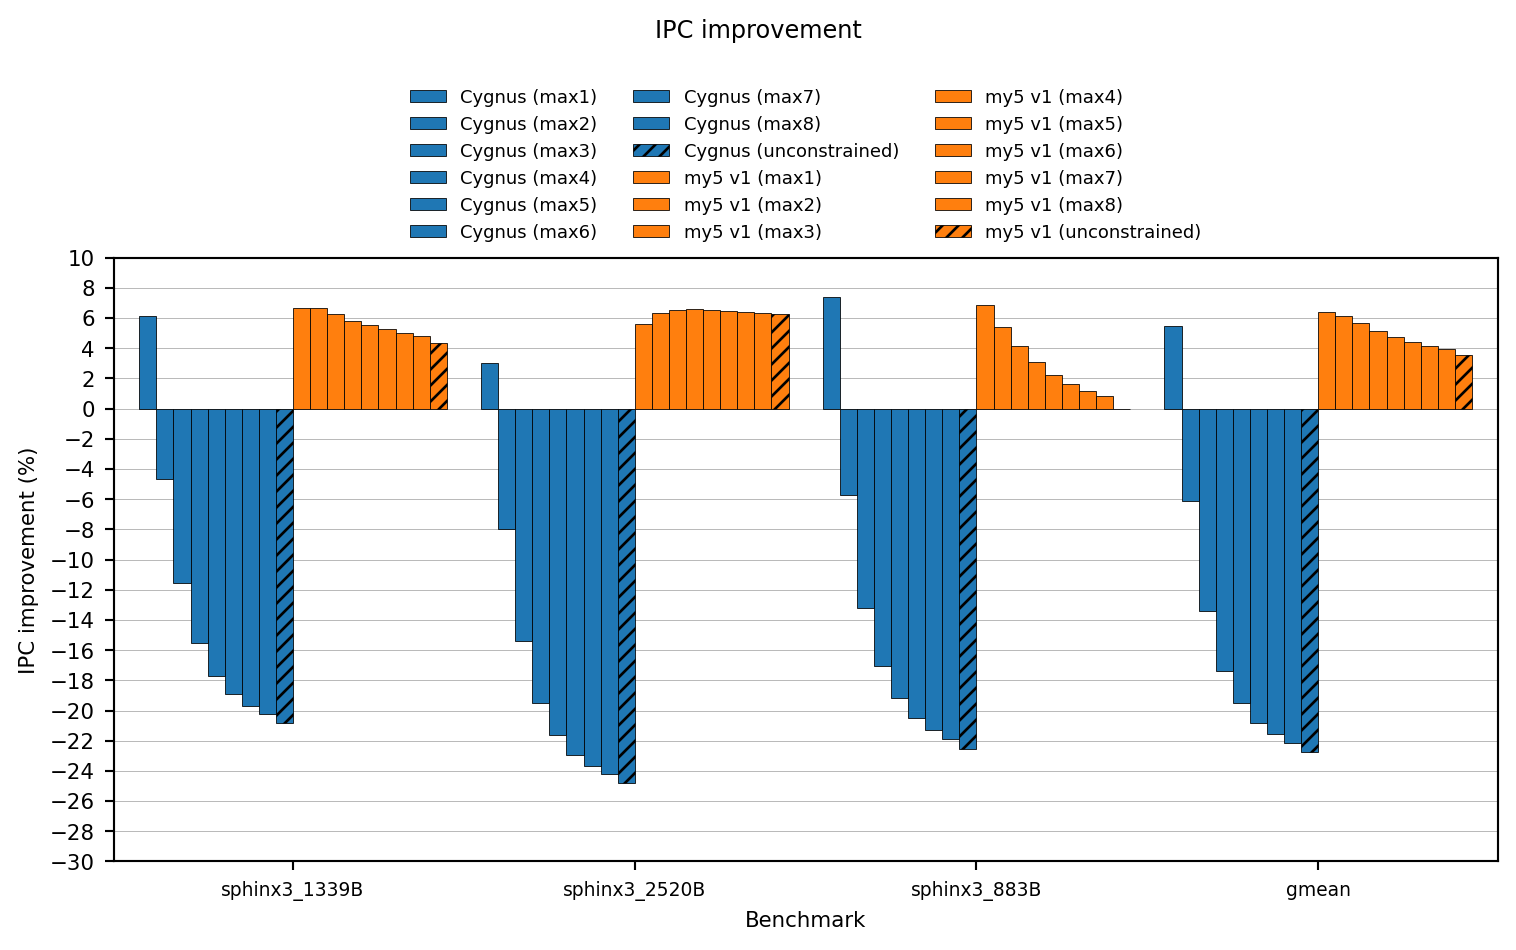

In [17]:
ipc_improvement__200__sphinx3 = tabler_200.table_statistic_mix(
    "cpu.gmean.ipc_improvement", experiments=experiments, add_mean=True,
    benchmarks={"sphinx3"})

ipc_improvement__200__sphinx3.display()

ipc_improvement__200__sphinx3.plot(
    legend_kwargs=legend_kwargs,
    label_kwargs=label_kwargs,
    colors=colors, hatches=hatches,
    add_suptitle=True, suptitle="IPC improvement",
    ylabel="IPC improvement (%)",
    ylim=(-30, 10), ytick_distance=2,
    figsize=figsize, dpi=dpi
)